# 품목별 수출입실적

In [65]:
import pandas as pd

export_pd_total=pd.read_excel("./file/성질별_수출입실적_202109252.xls", skiprows=[0,1,2,3,5])

C:\Users\pc\.conda\envs\hp_8_8\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [66]:
export_pd_total.info() #기간을 제외하고..모두 문자열임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      273 non-null    float64
 1   수출입구분   273 non-null    object 
 2   성질명     273 non-null    object 
 3   중량      273 non-null    object 
 4   금액      273 non-null    object 
dtypes: float64(1), object(4)
memory usage: 10.8+ KB


In [67]:
export_pd_total['금액']=export_pd_total['금액'].str.replace(pat=r'[^A-Za-z0-9]', repl='', regex=True) #"," 제거
export_pd_total['금액'] = pd.to_numeric(export_pd_total['금액'])
export_pd_total['금액'].dtypes

dtype('int64')

In [68]:
export_pd_total.drop(export_pd_total.loc[export_pd_total['성질명'] == '3. 경공업품'].index, inplace=True)
export_pd_total.drop(export_pd_total.loc[export_pd_total['성질명'] == '4. 중화학 공업품'].index, inplace=True)

In [69]:
export_pd_total["품목명"]=export_pd_total["성질명"].str.split('.').str[1] #성질명 내용 변환

In [70]:
condition=(export_pd_total["기간"]>=2019.08) & (export_pd_total["기간"]<2020.02)
export_pd_2019=export_pd_total[condition].sort_values("금액", ascending=False)

pd.options.display.float_format = '{:.1f}'.format #지수 변경확인
#pd.set_option('display.float_format', None)
#2019년동 성질명을 기준으로 한 평균 수출금액
export_pd_2019_mean=export_pd_2019[["품목명","금액"]].groupby(['품목명']).mean().sort_values(by='금액' ,ascending=False)
export_sum = export_pd_2019_mean["금액"].sum()
export_pd_2019_mean["수출 비중"] =export_pd_2019_mean["금액"]/export_sum*100
export_pd_2019_mean

,금액,수출 비중
품목명,,
"전기, 전자제품",14323629.8,32.8
수송장비,7141410.3,16.3
기계류와 정밀기기,5602094.7,12.8
화공품,5508529.7,12.6
원료 및 연료,4090526.3,9.4
철강제품,3520307.0,8.1
기 타,964946.1,2.2
식료 및 직접소비재,677170.2,1.5
"가죽, 고무 및 신발류",388195.3,0.9


In [71]:
condition=(export_pd_total["기간"]>=2020.02) & (export_pd_total["기간"]<=2020.07)
export_pd_2020=export_pd_total[condition].sort_values("금액", ascending=False)

#2020년 2월 이후동 성질명을 기준으로 한 평균 수출금액
export_pd_2020_mean=export_pd_2020[["품목명","금액"]].groupby(['품목명']).mean().sort_values(by='금액' ,ascending=False)
export_sum_2020 = export_pd_2020_mean["금액"].sum()
export_pd_2020_mean["수출 비중"] =export_pd_2020_mean["금액"]/export_sum_2020*100
export_pd_2020_mean

,금액,수출 비중
품목명,,
"전기, 전자제품",13999583.7,35.8
수송장비,5668328.7,14.5
화공품,5211762.5,13.3
기계류와 정밀기기,5149482.5,13.2
철강제품,3136713.2,8.0
원료 및 연료,2504992.8,6.4
기 타,930020.0,2.4
식료 및 직접소비재,709653.8,1.8
"가죽, 고무 및 신발류",333905.7,0.9


In [72]:
#코로나 전, 코로나 이후 데이터프레임 합치기
merge_export = pd.merge(export_pd_2019_mean,export_pd_2020_mean, how="left",on='품목명')
merge_export=merge_export.rename(columns={"품목명":"성질명","금액_x":"코로나 이전 수출금액", "수출 비중_x":"코로나 이전 수출비중",
                           "금액_y":"코로나 이후 수출금액", "수출 비중_y":"코로나 이후 수출비중" })

merge_export["품목명"]=merge_export.index #인덱스를 칼럼으로 변경
merge_export = merge_export[["품목명", "코로나 이전 수출금액","코로나 이전 수출비중","코로나 이후 수출금액","코로나 이후 수출비중"]]
merge_export=merge_export.reset_index(drop=True) #인덱스 추가
merge_export.head()

,품목명,코로나 이전 수출금액,코로나 이전 수출비중,코로나 이후 수출금액,코로나 이후 수출비중
0,"전기, 전자제품",14323629.8,32.8,13999583.7,35.8
1,수송장비,7141410.3,16.3,5668328.7,14.5
2,기계류와 정밀기기,5602094.7,12.8,5149482.5,13.2
3,화공품,5508529.7,12.6,5211762.5,13.3
4,원료 및 연료,4090526.3,9.4,2504992.8,6.4


In [73]:
# 수출금액 차이 확인(원료 및 연료, 기계류 및 정밀기기, )
merge_export["코로나 전후 수출금액차"]=merge_export["코로나 이후 수출금액"]-merge_export["코로나 이전 수출금액"]
merge_export_final=merge_export.sort_values(by='코로나 전후 수출금액차' ,ascending=True)
merge_export_final

,품목명,코로나 이전 수출금액,코로나 이전 수출비중,코로나 이후 수출금액,코로나 이후 수출비중,코로나 전후 수출금액차
4,원료 및 연료,4090526.3,9.4,2504992.8,6.4,-1585533.5
1,수송장비,7141410.3,16.3,5668328.7,14.5,-1473081.7
2,기계류와 정밀기기,5602094.7,12.8,5149482.5,13.2,-452612.2
5,철강제품,3520307.0,8.1,3136713.2,8.0,-383593.8
0,"전기, 전자제품",14323629.8,32.8,13999583.7,35.8,-324046.2
3,화공품,5508529.7,12.6,5211762.5,13.3,-296767.2
9,직 물,374659.8,0.9,291495.3,0.7,-83164.5
8,"가죽, 고무 및 신발류",388195.3,0.9,333905.7,0.9,-54289.7
6,기 타,964946.1,2.2,930020.0,2.4,-34926.1
14,섬유사,106931.8,0.2,76855.2,0.2,-30076.7


품목별로 보면, 5월 기준 수출비중 상위 5개 품목 중 반도체(7.1%)가 소폭 오른 반면, 일반기계(-27.8%), 석유화학(-34.3%), 자동차(-54.1%), 철강(-34.8%) 등 4개 품목의 수출은 급감함

수출이 가장 감소한 품목은 석유제품(-69.9%), 자동차부품(-66.7%). 자동차(-54.1%) 순으로 나타났다.

- https://www.kita.net/cmmrcInfo/cmmrcNews/cmmrcNews/cmmrcNewsDetail.do?pageIndex=1&nIndex=58544&sSiteid=1(한국무역협회)

이는 코로나19로 인한 전 세계적 봉쇄조치와 사회적 거리 두기로 경제활동이 위축되면서 경기변동에 민감한 자동차, 자동차부품, 섬유, 철강 등 국내 주력 품목의 수출에 영향을 미침

코로나19로 인해 세계 경제의 불확실성이 커지면서 안전자산에 대한 선호에 따라 2020년 4월부터 금·은·백금 수출이 급증함

## 우리나라 품목별 수출비중

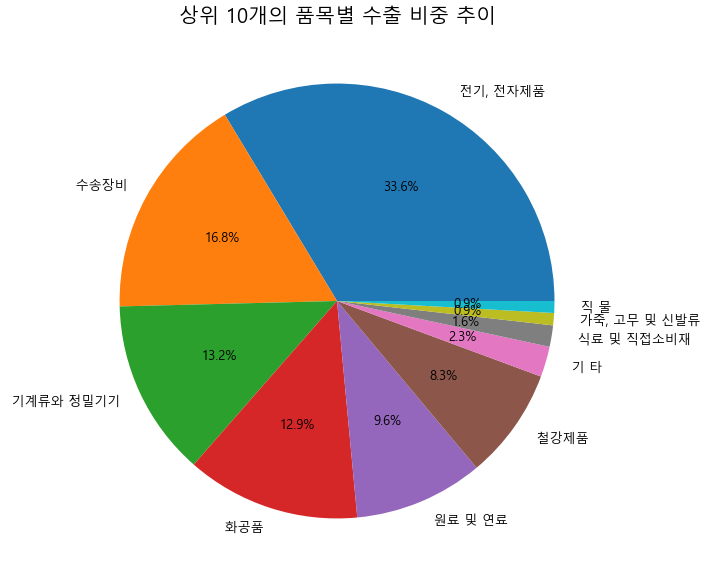

In [74]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

#폰트 설정
path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name, size=13)

#상위 품목별 수출비중 10
merge_export_pie=merge_export.sort_values(by='코로나 이전 수출비중' ,ascending=False)
merge_export_pie=merge_export_pie.head(10)
plt.figure(figsize=(30,10))
plt.title("상위 10개의 품목별 수출 비중 추이", fontsize=20)
plt.pie(merge_export_pie["코로나 이전 수출금액"], labels=merge_export_pie["품목명"], autopct='%1.1f%%')
plt.show()

## 코로나 전후 수출금액 추이

Text(0, 0.5, '수출금액')

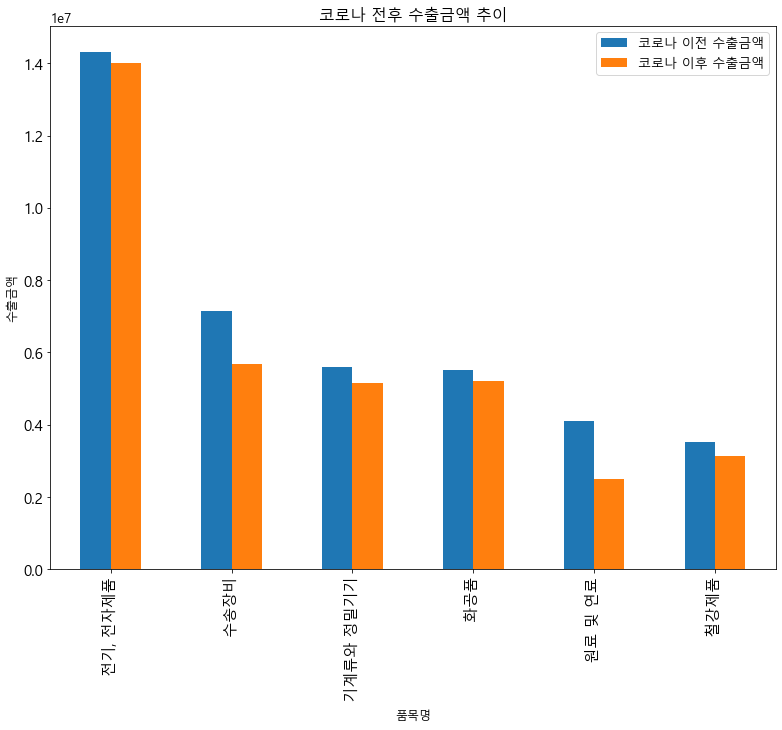

In [75]:
merge_export_5=merge_export.head(6)
merge_export_5=merge_export_5.set_index("품목명")[["코로나 이전 수출금액","코로나 이후 수출금액"]]

ax = merge_export_5.plot(kind='bar', title='코로나 전후 수출금액 추이', figsize=(13, 10), legend=True, fontsize=15)
ax.set_xlabel('품목명', fontsize=12)          # x축 정보 표시
ax.set_ylabel('수출금액', fontsize=12)     # y축 정보 표시

## 품목별 수출금액 변동 추이

In [76]:
df1=merge_export_final.head(3) 
df2=merge_export_final.tail(3)
result2 = pd.concat([df1,df2], ignore_index=True) #가장 위의 3개와 하단의 3개의 데이터프레임을 이어서 붙임
result2

,품목명,코로나 이전 수출금액,코로나 이전 수출비중,코로나 이후 수출금액,코로나 이후 수출비중,코로나 전후 수출금액차
0,원료 및 연료,4090526.3,9.4,2504992.8,6.4,-1585533.5
1,수송장비,7141410.3,16.3,5668328.7,14.5,-1473081.7
2,기계류와 정밀기기,5602094.7,12.8,5149482.5,13.2,-452612.2
3,의 류,153229.8,0.4,153008.3,0.4,-221.5
4,식료 및 직접소비재,677170.2,1.5,709653.8,1.8,32483.7
5,귀금속 및 보석류,182221.7,0.4,301502.3,0.8,119280.7


C:\Users\pc\.conda\envs\hp_8_8\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\.conda\envs\hp_8_8\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


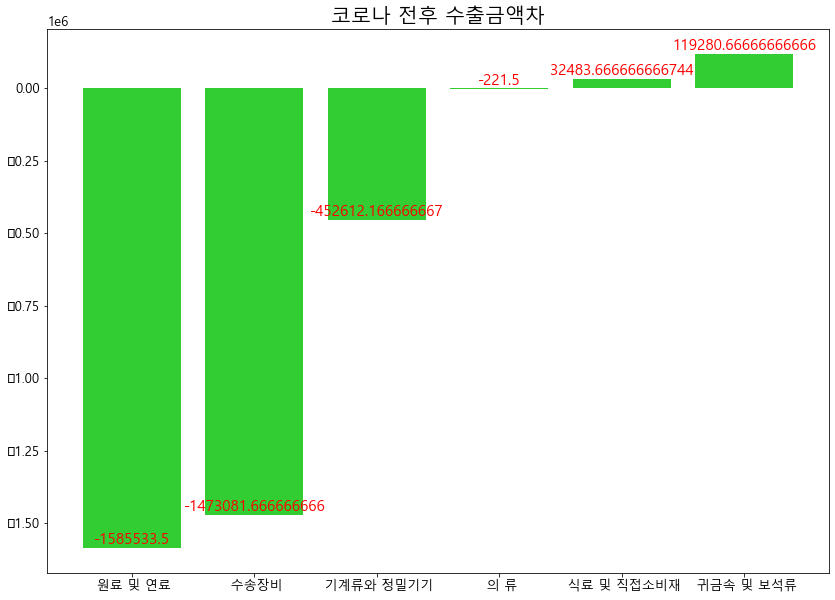

In [77]:
plt.figure(figsize=(14,10))
plt.title("코로나 전후 수출금액차", fontsize = 20)
x_data=result2["품목명"]
y_data=result2["코로나 전후 수출금액차"]
plt.bar(x_data,y_data,color='limegreen') #bar(막대를 표시할 위치, 막대의 높이)

for i, v in enumerate(x_data):
    plt.text(v, y_data[i], y_data[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='red',
             horizontalalignment='center', 
             verticalalignment='bottom') 
plt.show()

# 석유제품(정유된 제품 HS CODE : 2710--) 조사

우리나라 제일의 수출품목이 “석유”라는 놀라운 사실! 알고 계셨나요?

우리나라의 석유제품 수출량은 반도체 및 자동차 수출 비중은 전체 수출의 10% 이상을 차지하고 있습니다
(석유화학제품까지 포함시키면 약 19%를 차지)

우리나라 정유산업은 원유의 정유공정을 통해 여러가지 석유제품을 얻음

특히 원유 속에 들어있는 여러 가지 성분을 유용한 성분(휘발유, 등유, 경유, 중유 등)으로 분류한 제품과 불순물을 제거(정제)하거나 배합과정으로 얻은 제품들을 통틀어 석유제품으로 분류함

우리나라 석유제품 수출국 순위는 중국(36.9%), 일본(14.4%), 호주(8.8%), 미국(8.6%), 싱가폴(6.9%) 순으로 집계됨(2021년 기준)

대한석유협회 관계자는 “우리 정유사는 세계 5위 수준의 정제능력을 갖추고 있어 규모의 경제 실현이 가능하다”며 “석유제품 수요와 정제마진이 코로나19 이전 수준을 회복하기에는 다소 시간이 걸리겠지만 정유업계는 수출국 다변화와 국가별 수급상황에 맞춘 전략으로 글로벌 수출시장에서 경쟁해 나갈 것”이라고 밝힘

In [78]:
import pandas as pd
oil_trade_world=pd.read_excel("./file/Trade_Map_List_of_exporters_for_the_selected_product.xls.xlsx", skiprows=[i for i in range(10)])
oil_trade_world.rename(columns={"Exporters":"수출국가", "Exported value in 2019-M09":"2019-09","Exported value in 2019-M10":"2019-10",
                               "Exported value in 2019-M11":"2019-11", "Exported value in 2019-M12":"2019-12",
                               "Exported value in 2020-M01":"2020-01", "Exported value in 2020-M02":"2020-02", "Exported value in 2020-M03":"2020-03",
                               "Exported value in 2020-M04":"2020-04", "Exported value in 2020-M05":"2020-05", "Exported value in 2020-M06":"2020-06",
                               "Exported value in 2020-M07":"2020-07", "Exported value in 2020-M08":"2020-08"}, inplace=True) #칼럼명 변경
oil_trade_top=oil_trade_world.head(6)
oil_trade_top

,수출국가,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08
0,United States of America,7130081.0,7155486.0,7497227.0,8253071.0,7469257.0,7589559.0,6897315.0,4478148.0,2320100.0,3685098.0,4408155.0,4788086.0
1,Netherlands,4451683.0,4980915.0,4259883.0,4414259.0,4220848.0,3281521.0,3601791.0,1598865.0,1693371.0,2608986.0,2733973.0,2621577.0
2,Russian Federation,5975640.0,5431400.0,5405448.0,6121991.0,5343871.0,5064538.0,6070396.0,3357481.0,2816877.0,3210282.0,2816560.0,2466227.0
3,Singapore,3258047.0,4123956.0,3758476.0,3851768.0,3660444.0,2994776.0,2865463.0,1573542.0,1239147.0,1841634.0,2280136.0,2111352.0
4,"Korea, Republic of",3392261.0,3198578.0,3326639.0,3136949.0,3238804.0,2640531.0,2200589.0,1409320.0,1096076.0,1568299.0,1959125.0,1909639.0
5,China,3257418.0,2939981.0,4107251.0,3919240.0,3106194.0,3078963.0,3705094.0,3316770.0,1257680.0,1199767.0,1054764.0,1511162.0


## 코로나 전후 석유제품 수출추이 시각화

In [79]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

#폰트 설정
path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name, size=13)

oil_trade_top_trans=oil_trade_top.transpose()
oil_trade_top_trans

,0,1,2,3,4,5
수출국가,United States of America,Netherlands,Russian Federation,Singapore,"Korea, Republic of",China
2019-09,7130081.0,4451683.0,5975640.0,3258047.0,3392261.0,3257418.0
2019-10,7155486.0,4980915.0,5431400.0,4123956.0,3198578.0,2939981.0
2019-11,7497227.0,4259883.0,5405448.0,3758476.0,3326639.0,4107251.0
2019-12,8253071.0,4414259.0,6121991.0,3851768.0,3136949.0,3919240.0
2020-01,7469257.0,4220848.0,5343871.0,3660444.0,3238804.0,3106194.0
2020-02,7589559.0,3281521.0,5064538.0,2994776.0,2640531.0,3078963.0
2020-03,6897315.0,3601791.0,6070396.0,2865463.0,2200589.0,3705094.0
2020-04,4478148.0,1598865.0,3357481.0,1573542.0,1409320.0,3316770.0
2020-05,2320100.0,1693371.0,2816877.0,1239147.0,1096076.0,1257680.0


In [80]:
oil_trade_top_trans.rename(columns=oil_trade_top_trans.iloc[0],inplace=True)
df = oil_trade_top_trans.drop(oil_trade_top_trans.index[0])
df.head()

,United States of America,Netherlands,Russian Federation,Singapore,"Korea, Republic of",China
2019-09,7130081.0,4451683.0,5975640.0,3258047.0,3392261.0,3257418.0
2019-10,7155486.0,4980915.0,5431400.0,4123956.0,3198578.0,2939981.0
2019-11,7497227.0,4259883.0,5405448.0,3758476.0,3326639.0,4107251.0
2019-12,8253071.0,4414259.0,6121991.0,3851768.0,3136949.0,3919240.0
2020-01,7469257.0,4220848.0,5343871.0,3660444.0,3238804.0,3106194.0


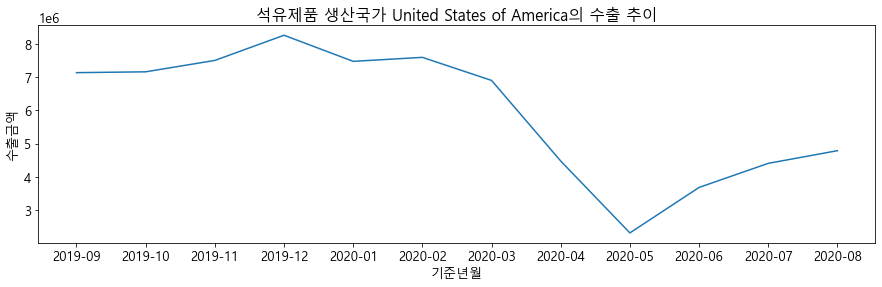

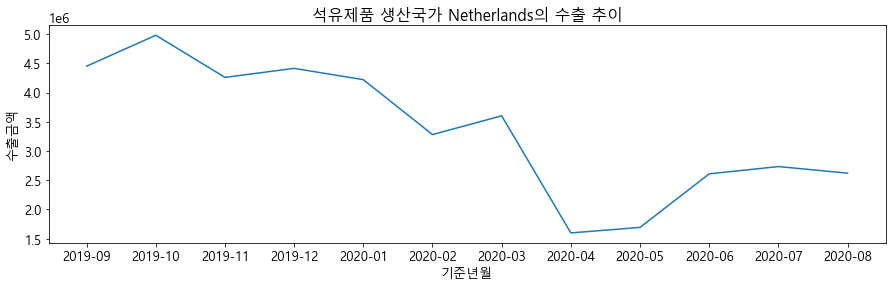

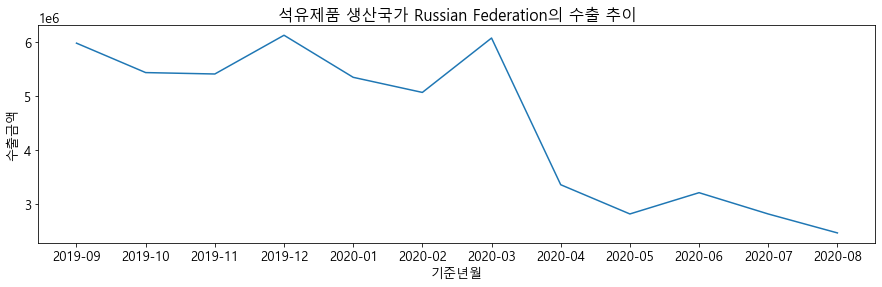

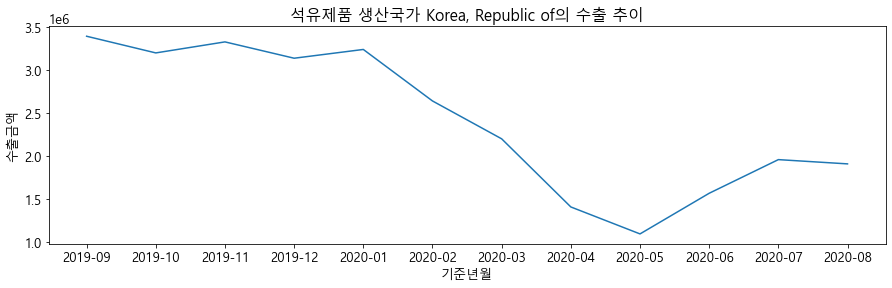

In [90]:
cntry_list= ["United States of America","Netherlands", "Russian Federation","Korea, Republic of"]
for cntry in cntry_list:
    df_filter=df[cntry]
    
    plt.figure(figsize=(15, 4))
    plt.plot(df_filter.index, df_filter)
    plt.title("석유제품 생산국가 {}의 수출 추이".format(cntry))
    plt.xlabel("기준년월")
    plt.ylabel("수출금액")
    plt.show()

## GUI

In [95]:
from tkinter import *
# plt.savefig('시각화_자료_이름.png')
def click_export():
    export_window = Tk() # 새 창
    export_window.title("Export")
    export_window.geometry("900x700")
    export_label= Label(export_window, text = "코로나 전후 수출 실적")
    export_label.pack()
    photo = PhotoImage(file="./시각화 자료/export_before_after.png", master = export_window)
    export_label.config(image=photo)
    export_window.mainloop()
def click_china():
    china_window = Tk() # 새 창
    china_window.title("Export to China")
    china_window.geometry("900x700")
    china_label= Label(china_window, text = "중국 품목별 수출 실적")
    china_label.pack()
    photo = PhotoImage(file='./시각화 자료/export_china_compare.png', master = china_window)
    china_label.config(image=photo)
    china_window.mainloop()
def click_import():
    import_window = Tk() # 새 창
    import_window.title("Import")
    import_window.geometry("900x700")
    import_label= Label(import_window, text = "코로나 전후 수입 실적")
    import_label.pack()
    photo = PhotoImage(file="./시각화 자료/import_before_after.png", master = import_window)
    import_label.config(image=photo)
    import_window.mainloop()
def click_saudi():
    saudi_window = Tk() # 새 창
    saudi_window.title("Import to Saudi")
    saudi_window.geometry("900x700")
    saudi_label= Label(saudi_window, text = "사우디아라비아 품목별 수입 실적")
    saudi_label.pack()
    photo = PhotoImage(file='./시각화 자료/import_saudi_compare.png', master = saudi_window)
    saudi_label.config(image=photo)
    saudi_window.mainloop()

def click_country_button():
    country_window = Tk() # 새 창
    country_window.title("Country")
    country_window.geometry("300x150")
    country_label= Label(country_window, text = "국가별 수출입실적")
    country_label.pack()
    listbox = Listbox(country_window, height=0)
    listbox.insert(0, '코로나 전후 수출 실적')
    listbox.insert(1, '코로나 전후 수입 실적')
    listbox.insert(2, '중국 품목별 수출 실적')
    listbox.insert(3, '사우디 품목별 수입 실적')

    def click_listbox(event):
        select = event.widget.curselection()
        #global photo
        if select[0] == 0: # 수출
            click_export()
        elif select[0] == 1: # 수입
            click_import()
        elif select[0] == 2: # 중국 품목
            click_china()
        else: # 사우디 품목
            click_saudi()
    listbox.bind('<<ListboxSelect>>',click_listbox) # add
    listbox.pack()
    country_window.mainloop()

    
    
#품목별 부분

def click_item_export():
    item_export_window = Tk() # 새 창
    item_export_window.title("item_export")
    item_export_window.geometry("900x700")
    export_label= Label(item_export_window, text = "상위 10개의 품목별 수출 비중 추이")
    export_label.pack()
    photo = PhotoImage(file="./image/export_top10.png", master = item_export_window)
    export_label.config(image=photo)
    item_export_window.mainloop()
def click_item_price_mean():
    item_price_mean_window = Tk() # 새 창
    item_price_mean_window.title("item_export")
    item_price_mean_window.geometry("900x1000")
    export_label= Label(item_price_mean_window, text = "코로나 전후 평균수출금액")
    export_label.pack()
    photo = PhotoImage(file="./image/export_price.png", master = item_price_mean_window)
    export_label.config(image=photo)
    item_price_mean_window.mainloop()
def click__item_price_sub():
    item_price_sub_window = Tk() # 새 창
    item_price_sub_window.title("item_export")
    item_price_sub_window.geometry("900x1000")
    export_label= Label(item_price_sub_window, text = "코로나 전후 평균수출금액차")
    export_label.pack()
    photo = PhotoImage(file="./image/export_price_sub.png", master = item_price_sub_window)
    export_label.config(image=photo)
    item_price_sub_window.mainloop()
def click_oil_nation():
    oil_nation_window = Tk() # 새 창
    oil_nation_window.title("item_export")
    oil_nation_window.geometry("900x1000")
    export_label= Label(oil_nation_window, text = "코로나 전후 평균수출금액차")
    export_label.pack()
    photo = PhotoImage(file="./image/oil_country.png", master =oil_nation_window)
    export_label.config(image=photo)
    oil_nation_window.mainloop()
    
def click_item_button():
    item_window = Tk() # 새 창
    item_window.title("Item")
    item_window.geometry("500x400")
    item_label= Label(item_window, text = "품목별 수출입실적")
    item_label.pack()
    
    listbox = Listbox(item_window, height=0)
    listbox.insert(0, '상위 10개의 품목별 수출 비중 추이')
    listbox.insert(1, '코로나 전후 평균수출금액')
    listbox.insert(2, '코로나 전후 평균수출금액차')
    listbox.insert(3, '석유제품 생산국 수출추이')
    
    def click_listbox(event):
        select = event.widget.curselection()
        #global photo
        if select[0] == 0: # 수출 비중
            click_item_export()
        elif select[0] == 1: # 평균 수출금액
            click_item_price_mean()
        elif select[0] == 2: # 평균 수출금액차
            click__item_price_sub()
        else: # 석유제품 생산국 수출추아
            click_oil_nation()
    listbox.bind('<<ListboxSelect>>',click_listbox) # add
    listbox.pack()
    item_window.mainloop()
    


def click_city_button():
    city_window = Tk() # 새 창
    city_window.title("City")
    city_window.geometry("500x400")
    city_label= Label(city_window, text = "시도별 수출입실적")
    city_label.pack()

window = Tk()
window.title("Team 3")
window.geometry("400x300") # 가로 * 세로
label = Label(window, text = "신종 코로나 바이러스 확산 이후 우리나라 수출 통계 분석")
label.pack()
countryButton = Button(window, text="국가별 수출입실적", command=click_country_button)
itemButton = Button(window, text="품목별 수출입실적", command=click_item_button)
cityButton = Button(window, text="시도별 수출입실적", command=click_city_button)
countryButton.pack()
itemButton.pack()
cityButton.pack()
window.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\pc\.conda\envs\hp_8_8\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-95-1e8062041998>", line 56, in click_listbox
    click_export()
  File "<ipython-input-95-1e8062041998>", line 9, in click_export
    photo = PhotoImage(file="./시각화 자료/export_before_after.png", master = export_window)
  File "C:\Users\pc\.conda\envs\hp_8_8\lib\tkinter\__init__.py", line 3545, in __init__
    Image.__init__(self, 'photo', name, cnf, master, **kw)
  File "C:\Users\pc\.conda\envs\hp_8_8\lib\tkinter\__init__.py", line 3501, in __init__
    self.tk.call(('image', 'create', imgtype, name,) + options)
_tkinter.TclError: couldn't open "./시각화 자료/export_before_after.png": no such file or directory
